In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
adata = ov.read('/home/lugli/spuccio/Projects/SP039/GBmap/Zeng2023_Part1.h5ad')

In [3]:
adata = adata[:, adata.var.highly_variable_features]

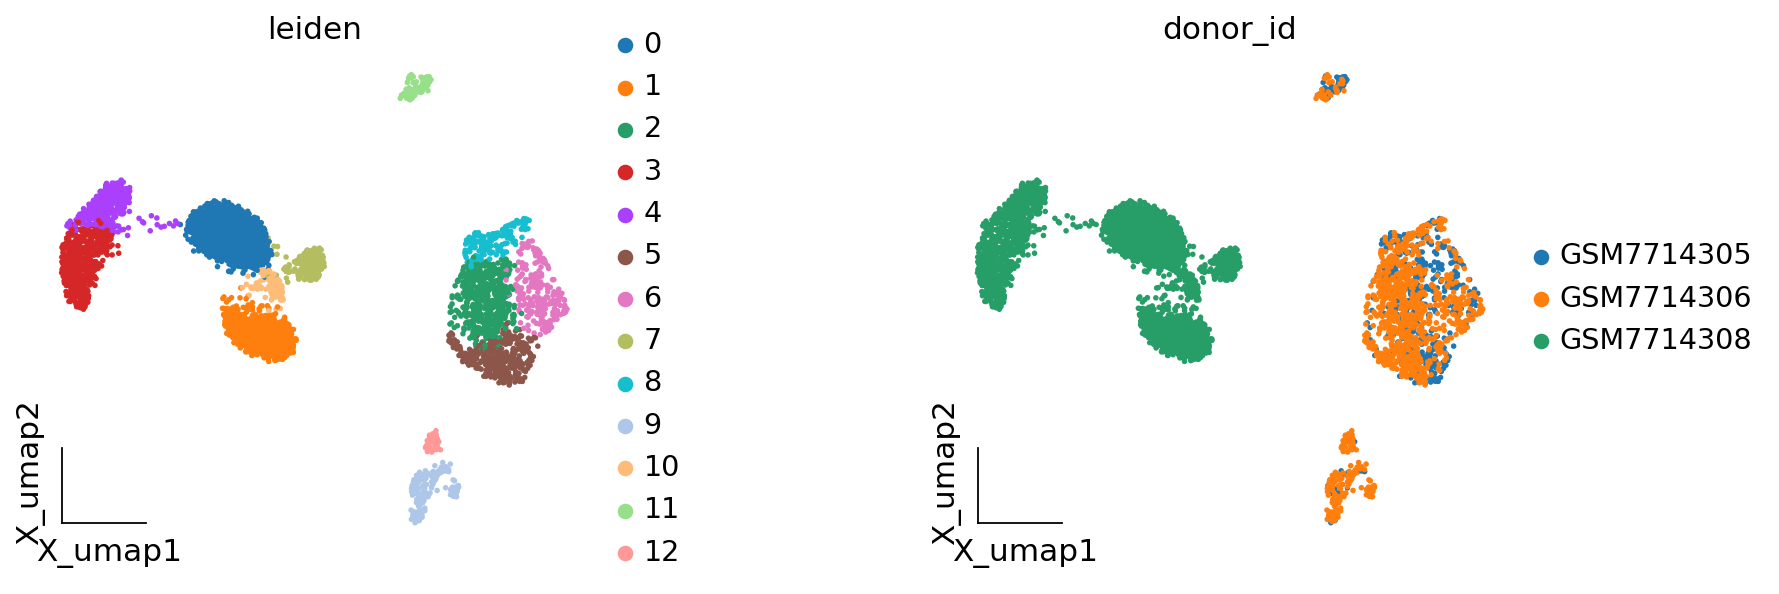

In [4]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [5]:
ov.single.batch_correction(adata,batch_key='donor_id',
                                        methods='harmony',n_pcs=50)
adata

2025-03-31 17:48:31,425 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


...Begin using harmony to correct batch effect


2025-03-31 17:48:34,888 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-31 17:48:34,935 - harmonypy - INFO - Iteration 1 of 10
2025-03-31 17:48:36,864 - harmonypy - INFO - Iteration 2 of 10
2025-03-31 17:48:38,326 - harmonypy - INFO - Iteration 3 of 10
2025-03-31 17:48:40,237 - harmonypy - INFO - Iteration 4 of 10
2025-03-31 17:48:40,940 - harmonypy - INFO - Converged after 4 iterations


AnnData object with n_obs × n_vars = 4797 × 2000
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch', 'leiden'
    var: 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca', 'X_harmony'
    obsp: 'connectivities', 'distances'

In [6]:
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [7]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:10)
CPU times: user 10.2 s, sys: 3.79 s, total: 14 s
Wall time: 10.1 s


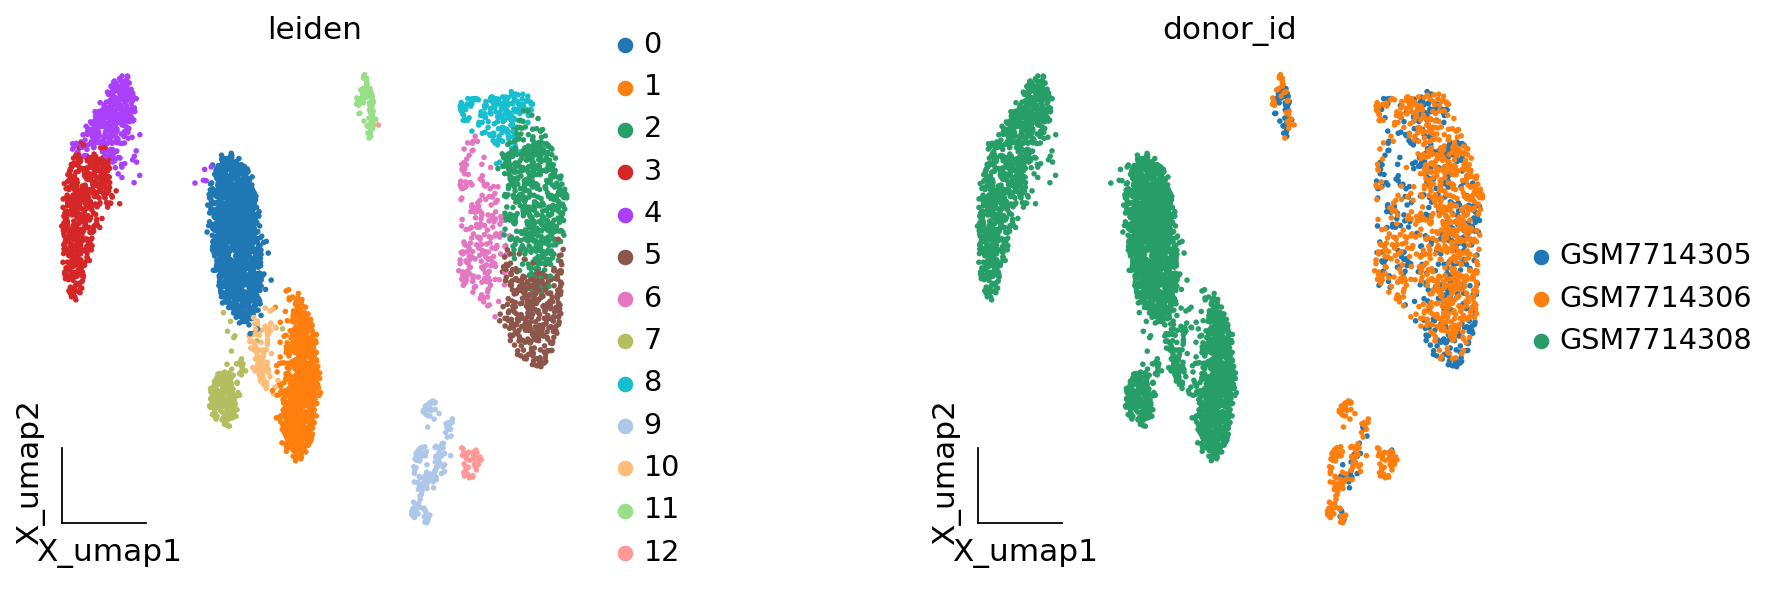

In [8]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [9]:
ov.pp.leiden(adata,resolution=0.5)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


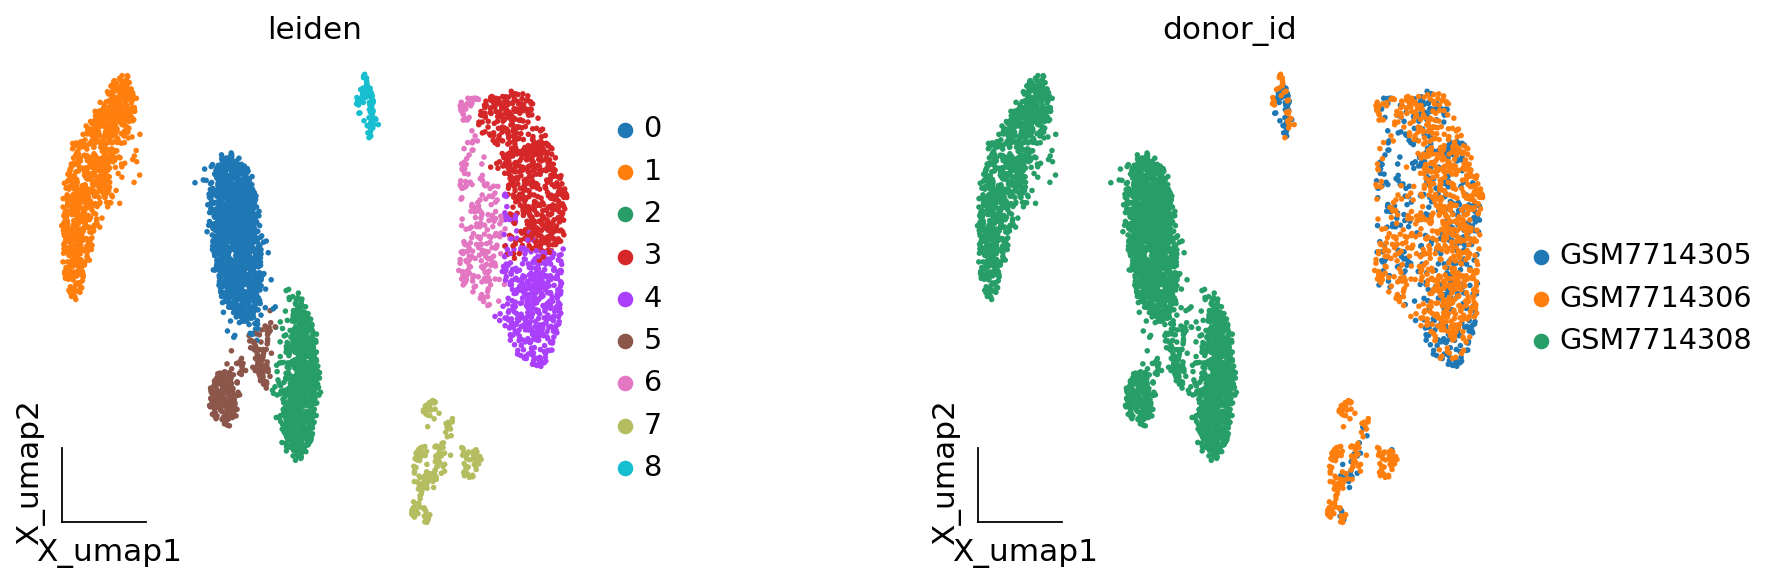

In [10]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [11]:
scsa=ov.single.pySCSA(adata=adata,
                      foldchange=1.5,
                      pvalue=0.01,
                      celltype='normal',
                      target='cellmarker',
                      tissue='Brain',
                      model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'                    
)

In [12]:
anno=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:01)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 552
Other Gene number: 69
!WARNING3:Zero marker sets found, type:marker
!WARNING3:Change the threshold or tissue name and try again?
!WARNING3:EnsemblID or GeneID,try '-E' command?
Cluster 1 Gene number: 354
Other Gene number: 69
!WARNING3:Zero marker sets found, type:marker
!WARNING3:Change the threshold or tissue name and try again?
!WARNING3:EnsemblID or GeneID,try '-E' command?
Cluster 2 Gene number: 399
Other Gene number: 69
Cluster 3 Gene number: 84
Other Gene number: 68
Cluster 4 Gene number: 83
Other Gene number: 69
!WARNING3:Zero marker sets found, type:marker
!

In [13]:
scsa.cell_auto_anno(adata,key='scsa_celltype_cellmarker')

...cell type added to scsa_celltype_cellmarker on obs of anndata


In [14]:
scsa=ov.single.pySCSA(adata=adata,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='normal',
                          target='panglaodb',
                          tissue='Brain',
                          model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'
                          
)

In [15]:
res=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:00:01)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 552
Other Gene number: 80
!WARNING3:Zero marker sets found, type:marker
!WARNING3:Change the threshold or tissue name and try again?
!WARNING3:EnsemblID or GeneID,try '-E' command?
Cluster 1 Gene number: 354
Other Gene number: 80
!WARNING3:Zero marker sets found, type:marker
!WARNING3:Change the threshold or tissue name and try again?
!WARNING3:EnsemblID or GeneID,try '-E' command?
Cluster 2 Gene number: 399
Other Gene number: 80
Cluster 3 Gene number: 84
Other Gene number: 79
Cluster 4 Gene number: 83
Other Gene number: 80
!WARNING3:Zero marker sets found, type:marker
!

In [16]:
scsa.cell_anno_print()

Cluster:0	Cell_type:Adipocytes|Ductal Cells	Z-score:nan|nan
Cluster:3	Cell_type:NK Cells|Decidual Cells	Z-score:2.816|2.764
Cluster:4	Cell_type:Dendritic Cells|T Cells	Z-score:3.28|2.839
Cluster:6	Cell_type:T Cells|NK Cells	Z-score:3.088|2.86
Cluster:7	Cell_type:Dendritic Cells|Monocytes	Z-score:3.173|2.85
Cluster:8	Cell_type:B Cells|Plasma Cells	Z-score:3.088|2.638


In [17]:
scsa.cell_auto_anno(adata,key='scsa_celltype_panglaodb')

...cell type added to scsa_celltype_panglaodb on obs of anndata


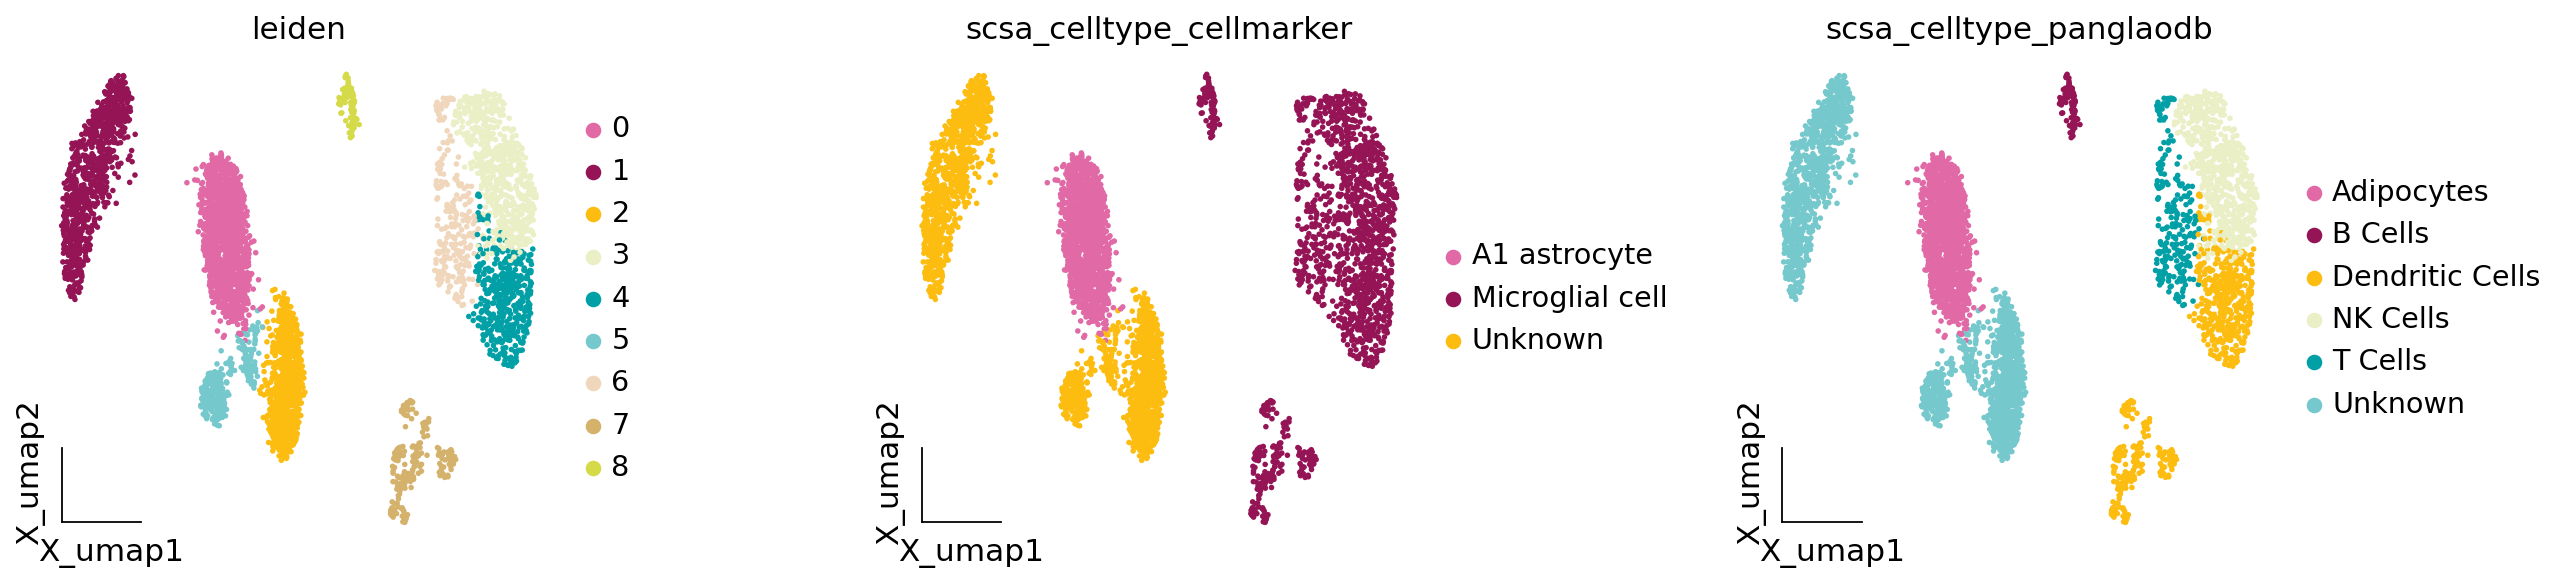

In [18]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['leiden','scsa_celltype_cellmarker','scsa_celltype_panglaodb'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

In [19]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Zeng2023_Part2.h5ad")

In [20]:
adata

AnnData object with n_obs × n_vars = 4797 × 2000
    obs: 'n_genes', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'author', 'donor_id', 'batch', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'umap', 'rank_genes_groups', 'scsa_celltype_cellmarker_colors', 'scsa_celltype_panglaodb_colors'
    obsm: 'X_pca', 'X_umap', 'scaled|original|X_pca', 'X_harmony'
    obsp: 'connectivities', 'distances'